In [1]:
from GRASP import GRASP

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import dataset_config as dataset_config
from tqdm import tqdm
import math
dataConfig = dataset_config.DatasetConfig()

database = dataConfig.database
poi_dict = dataConfig.poi_dict
database_function = dataConfig.database_func
poi_cate_dict = dataConfig.poi_cate_dict

In [4]:
# 取消输出warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
import json
file_name = "final_datas/1-all_llm_data_output_202409012012_glm4air.json"

with open(file_name,'r', encoding='UTF-8') as f:
     cases_dataset = json.load(f)

all_results = cases_dataset
all_results

[{'request_id': 'request-1',
  'content': {'poi_name_list': [['北京酒店', '王府井小吃街'],
    ['北京酒店', '天安门广场', '故宫博物院', '王府井大街'],
    ['北京酒店', '颐和园', '圆明园'],
    ['北京酒店', '八达岭长城', '长城脚下的公社'],
    ['北京酒店', '天坛公园', '前门大街'],
    ['北京酒店', '水立方', '国家大剧院', '北京烤鸭店']],
   'poi_cate_list': [['酒店', '餐厅'],
    ['酒店', '景点', '景点', '购物'],
    ['酒店', '景点', '景点'],
    ['酒店', '景点', '餐厅'],
    ['酒店', '景点', '购物'],
    ['酒店', '景点', '景点', '餐厅']],
   'poi_rec_time_list': [[1.0, 2.0],
    [1.0, 2.0, 2.5, 1.5],
    [1.0, 3.0, 2.0],
    [1.0, 4.0, 1.5],
    [1.0, 2.5, 1.5],
    [1.0, 2.0, 2.0, 2.0]],
   'poi_arrive_time_list': [['09:00:00', '11:00:00'],
    ['09:00:00', '10:00:00', '12:00:00', '14:00:00'],
    ['09:00:00', '10:00:00', '13:00:00'],
    ['09:00:00', '10:00:00', '15:00:00'],
    ['09:00:00', '10:30:00', '13:00:00'],
    ['09:00:00', '10:30:00', '13:00:00', '17:00:00']]}},
 {'request_id': 'request-2',
  'content': {'poi_name_list': [['北京酒店', '八达岭长城', '长城脚下的公社', '北京酒店'],
    ['北京酒店', '天安门广场', '故宫博物院', '王府井

In [6]:
import json

with open('final_datas/5-analyze_json_input_glm4air_tp0_2_add_classify_layer.json', 'r', encoding='utf-8') as file:
    all_data = json.load(file)

all_data

[{'custom_id': 'request-1',
  'poi_case': {'poi_feature': '经典、全面',
   'route_num': 6,
   'poi_name_list': ['八达岭长城', '水立方(国家游泳中心)'],
   'catering_feature': '常规',
   'N_c_min': [1, 2, 2],
   'N_c_max': [10, 3, 2],
   'use_min_restaurant_gap': 10800,
   'time_feature': '慢节奏',
   'start_day_time': '09:00:00',
   'plan_max_time': 12,
   'tightness_w': 1.5},
  'user_query': {'request_id': 'request-1',
   'content': '想规划一个6天的经典全面之旅，期望访问八达岭长城和水立方，餐饮上希望是常规些的，行程节奏希望比较慢，每天大概9点开始，最长时间不超过12个小时。'},
  'json_input': {'request_id': 'request-1',
   'content': {'N_c_min': [2, 2, 2],
    'N_c_max': [6, 3, 3],
    'use_min_restaurant_gap': 2.5,
    'poi_id_list': ['八达岭长城', '水立方'],
    'route_num': 6,
    'start_day_time': '09:00:00',
    'plan_max_time': 12,
    'tightness_w': 1.2,
    'user_budget': 1000000000.0,
    'not_poi_list': []}},
  'time_cate': {'request_id': 'request-1', 'content': {'time_feature': '慢节奏'}},
  'catering_cate': {'request_id': 'request-1',
   'content': {'catering_feature': '常规'}}}

In [7]:
#比对poi_list
count = 0
re_id1 = []
for index, value in enumerate(all_data):
    judge = True
    if value["poi_case"]["poi_name_list"]:
        # 判断poi_name是否为poi_id_list中某个值的子字符串，或poi_id_list中的某个值是否是poi_name的子字符串
        for poi_name in value["poi_case"]["poi_name_list"]:
            if not any(poi_name in poi_id or poi_id in poi_name for poi_id in [item for day_route in all_results[index]['content']['poi_name_list'] for item in day_route]):
                judge = False
                count += 1
                print(f"Mismatch at index {index} (custom_id: {value['custom_id']})")
                re_id1.append(value['custom_id'])
                print(f"poi_name {poi_name} does not match any item in json_input poi_id_list")
                break
    # if not judge:
    #     print(f"user_query:{value['user_query']['content']}")
    #     print(f"poi_case:{value['poi_case']['poi_name_list']}")
    #     print(f"json_input:{value['json_input']['content']['poi_id_list']}")
    #     print(f"results:{[item[poi_dict['poi_name']] for day_route in all_results[index]['results'] for item in day_route]}")
    #     print("------------------------------------------------------------")

print(f"Total mismatches where poi_name does not sufficiently match json_input poi_id_list: {count}")

Mismatch at index 1 (custom_id: request-2)
poi_name 水立方(国家游泳中心) does not match any item in json_input poi_id_list
Mismatch at index 61 (custom_id: request-62)
poi_name 798艺术区 does not match any item in json_input poi_id_list
Mismatch at index 62 (custom_id: request-63)
poi_name 明十三陵 does not match any item in json_input poi_id_list
Mismatch at index 63 (custom_id: request-64)
poi_name 明十三陵 does not match any item in json_input poi_id_list
Mismatch at index 64 (custom_id: request-65)
poi_name 明十三陵 does not match any item in json_input poi_id_list
Mismatch at index 66 (custom_id: request-67)
poi_name 鸟巢(国家体育场) does not match any item in json_input poi_id_list
Mismatch at index 67 (custom_id: request-68)
poi_name 鸟巢(国家体育场) does not match any item in json_input poi_id_list
Mismatch at index 68 (custom_id: request-69)
poi_name 明十三陵 does not match any item in json_input poi_id_list
Mismatch at index 69 (custom_id: request-70)
poi_name 明十三陵 does not match any item in json_input poi_id_list
Mi

In [9]:
#比对poi_list
count = 0
re_id1 = []
for index, value in enumerate(all_data):
    judge = True
    if value["poi_case"]["poi_name_list"]:
        # 判断poi_name是否为poi_id_list中某个值的子字符串，或poi_id_list中的某个值是否是poi_name的子字符串
        for poi_name in value['json_input']['content'].get('poi_id_list',[]):
            if not any(poi_name in poi_id or poi_id in poi_name for poi_id in [item for day_route in all_results[index]['content']['poi_name_list'] for item in day_route]):
                judge = False
                count += 1
                print(f"Mismatch at index {index} (custom_id: {value['custom_id']})")
                re_id1.append(value['custom_id'])
                print(f"poi_name {poi_name} does not match any item in json_input poi_id_list")
                break
    # if not judge:
    #     print(f"user_query:{value['user_query']['content']}")
    #     print(f"poi_case:{value['poi_case']['poi_name_list']}")
    #     print(f"json_input:{value['json_input']['content']['poi_id_list']}")
    #     print(f"results:{[item[poi_dict['poi_name']] for day_route in all_results[index]['results'] for item in day_route]}")
    #     print("------------------------------------------------------------")

print(f"Total mismatches where poi_name does not sufficiently match json_input poi_id_list: {count}")

Mismatch at index 176 (custom_id: request-177)
poi_name 安门广场 does not match any item in json_input poi_id_list
Mismatch at index 198 (custom_id: request-199)
poi_name 天安门广场 does not match any item in json_input poi_id_list
Mismatch at index 265 (custom_id: request-266)
poi_name 国家体育场（鸟巢） does not match any item in json_input poi_id_list
Mismatch at index 378 (custom_id: request-379)
poi_name 国家体育场（鸟巢） does not match any item in json_input poi_id_list
Mismatch at index 445 (custom_id: request-446)
poi_name 老北京小吃 does not match any item in json_input poi_id_list
Mismatch at index 447 (custom_id: request-448)
poi_name 北京坊 does not match any item in json_input poi_id_list
Mismatch at index 448 (custom_id: request-449)
poi_name 大栅栏历史文化街区 does not match any item in json_input poi_id_list
Mismatch at index 449 (custom_id: request-450)
poi_name 大栅栏街 does not match any item in json_input poi_id_list
Mismatch at index 452 (custom_id: request-453)
poi_name 北京小吃 does not match any item in json_inp

In [10]:
#route_num 满足情况
count = 0
for index, value in enumerate(all_data):
    if value["poi_case"]["route_num"] != len(all_results[index]['content']['poi_name_list']):
        count += 1
        print(f"Mismatch at index {index} (custom_id: {value['custom_id']})")
        print(f"route_num: {value['poi_case']['route_num']}, len(poi_name_list): {len(all_results[index]['content']['poi_name_list'])}")
print(f"Total mismatches where route_num does not match len(poi_name_list): {count}")

Mismatch at index 3 (custom_id: request-4)
route_num: 6, len(poi_name_list): 11
Mismatch at index 125 (custom_id: request-126)
route_num: 6, len(poi_name_list): 7
Mismatch at index 558 (custom_id: request-559)
route_num: 4, len(poi_name_list): 5
Mismatch at index 942 (custom_id: request-943)
route_num: 5, len(poi_name_list): 6
Mismatch at index 1202 (custom_id: request-1203)
route_num: 1, len(poi_name_list): 2
Mismatch at index 1204 (custom_id: request-1205)
route_num: 1, len(poi_name_list): 2
Mismatch at index 1225 (custom_id: request-1226)
route_num: 1, len(poi_name_list): 2
Mismatch at index 1253 (custom_id: request-1254)
route_num: 1, len(poi_name_list): 2
Mismatch at index 1259 (custom_id: request-1260)
route_num: 1, len(poi_name_list): 2
Mismatch at index 1285 (custom_id: request-1286)
route_num: 1, len(poi_name_list): 2
Mismatch at index 1298 (custom_id: request-1299)
route_num: 1, len(poi_name_list): 2
Mismatch at index 1301 (custom_id: request-1302)
route_num: 1, len(poi_name_

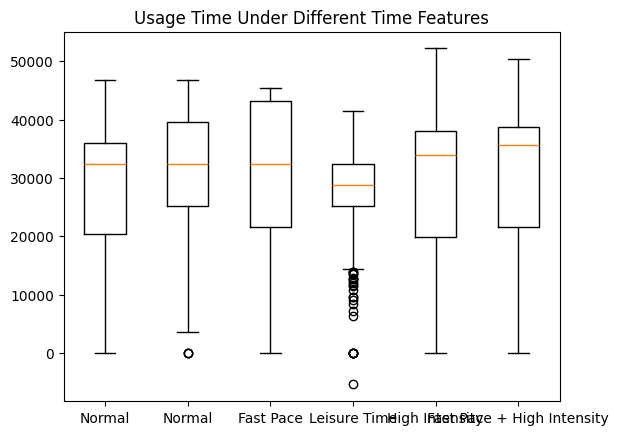

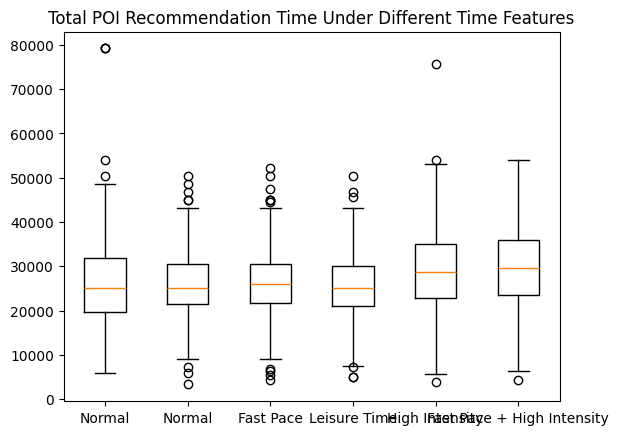

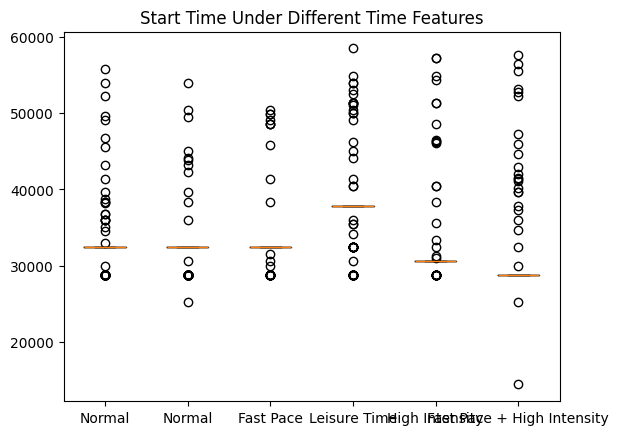

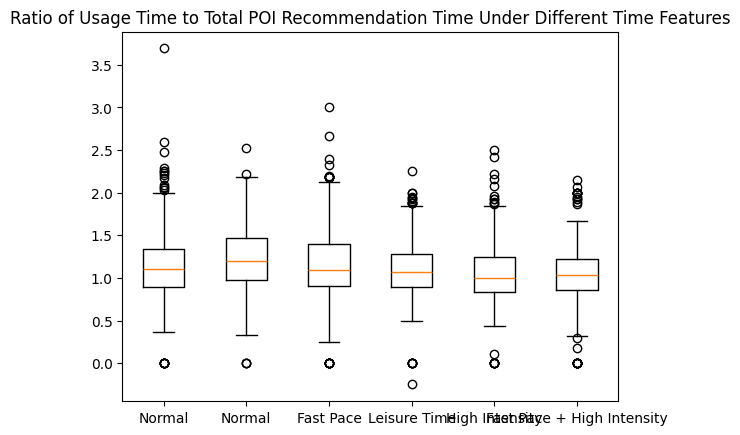

In [14]:
import json
import time
import matplotlib.pyplot as plt

def time_to_seconds(time_str):
    """
    Convert a time string in HH:MM:SS or HH:SS format to seconds.
    
    :param time_str: A string representing time, e.g., "12:34:56" or "12:34".
    :return: The total number of seconds as an integer.
    """
    try:
        parts = time_str.split(':')
        if len(parts) == 3:
            hours, minutes, seconds = parts
        elif len(parts) == 2:
            hours, minutes = parts
            seconds = 0
        else:
            raise ValueError("Invalid time format")
        
        # Convert all time components to integers and calculate total seconds
        total_seconds = int(hours) * 3600 + int(minutes) * 60 + int(seconds)
        return total_seconds
    except:
        return 9*3600

# Initialize lists for different time features
use_time = [[] for i in range(6)]
start_time = [[] for i in range(6)]
poi_total_rec_time = [[] for i in range(6)]

# Assuming 'all_data' and 'all_results' are defined with your data
for index, value in enumerate(all_data):
    time_feature = value["poi_case"]['time_feature']
    if time_feature == "慢节奏":
        idx = 0
    elif time_feature == "正常":
        idx = 1
    elif time_feature == "快节奏":
        idx = 2
    elif time_feature == "时间休闲":
        idx = 3
    elif time_feature == "时间高强度":
        idx = 4
    else:
        idx = 5

    try:
        use_time[idx].append(sum([(time_to_seconds(item[-1]) - time_to_seconds(item[0])) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    except:
        # print([item for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list'])
        raise ValueError("Invalid time format")
    start_time[idx].append(sum([time_to_seconds(item[0]) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    poi_total_rec_time[idx].append(sum([item*3600 if item <= 24 else item for day_route in all_results[index]['content']['poi_rec_time_list'] for item in day_route]) / len(all_results[index]['content']['poi_rec_time_list']))

# Save data
time_feature_results = {
    'use_time': use_time,
    'start_time': start_time,
    'poi_total_rec_time': poi_total_rec_time
}

with open(f'time_feature_results_{time.strftime("%Y%m%d%H%M%S")}.json', 'w') as f:
    json.dump(time_feature_results, f)

# Boxplot for use_time
plt.boxplot(use_time, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Usage Time Under Different Time Features')
plt.show()

# Boxplot for poi_total_rec_time
plt.boxplot(poi_total_rec_time, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Total POI Recommendation Time Under Different Time Features')
plt.show()

# Boxplot for start_time
plt.boxplot(start_time, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Start Time Under Different Time Features')
plt.show()

# Boxplot for the ratio of total_use_time to poi_total_rec_time
ratios = [[x/y if y != 0 else 0 for x, y in zip(sub_use_time, sub_poi_time)] for sub_use_time, sub_poi_time in zip(use_time, poi_total_rec_time)]
plt.boxplot(ratios, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Ratio of Usage Time to Total POI Recommendation Time Under Different Time Features')
plt.show()

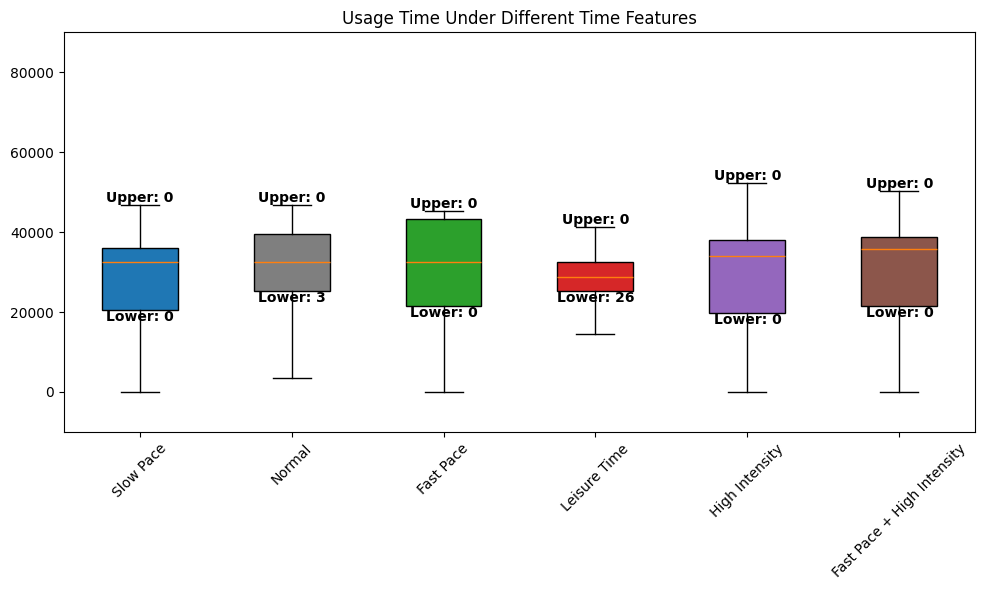

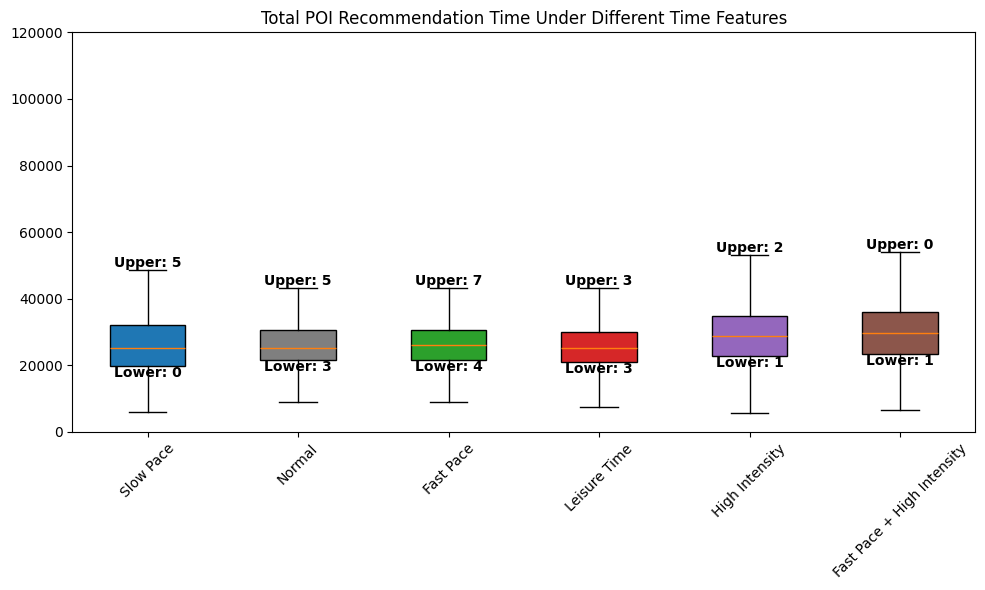

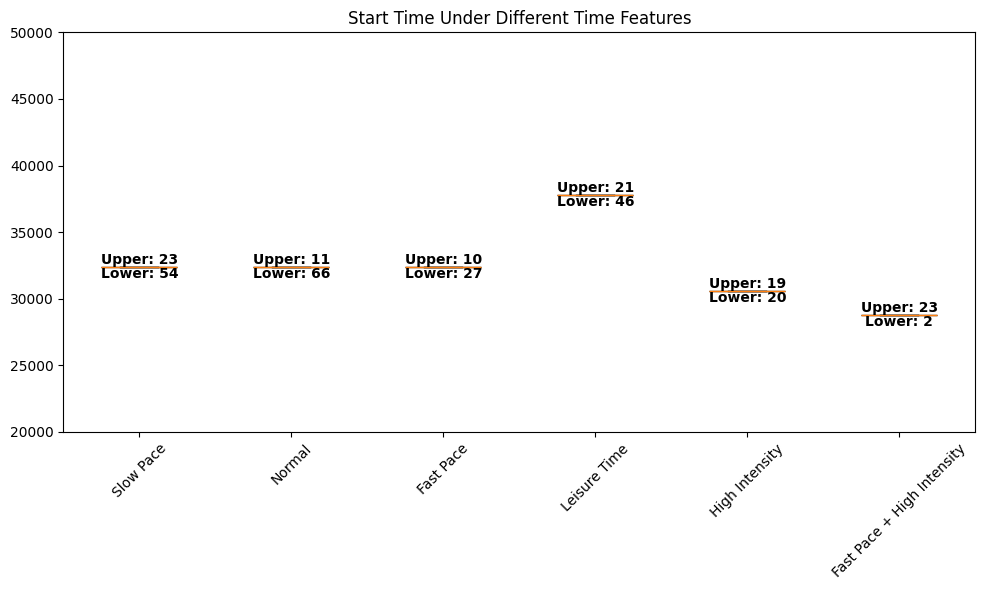

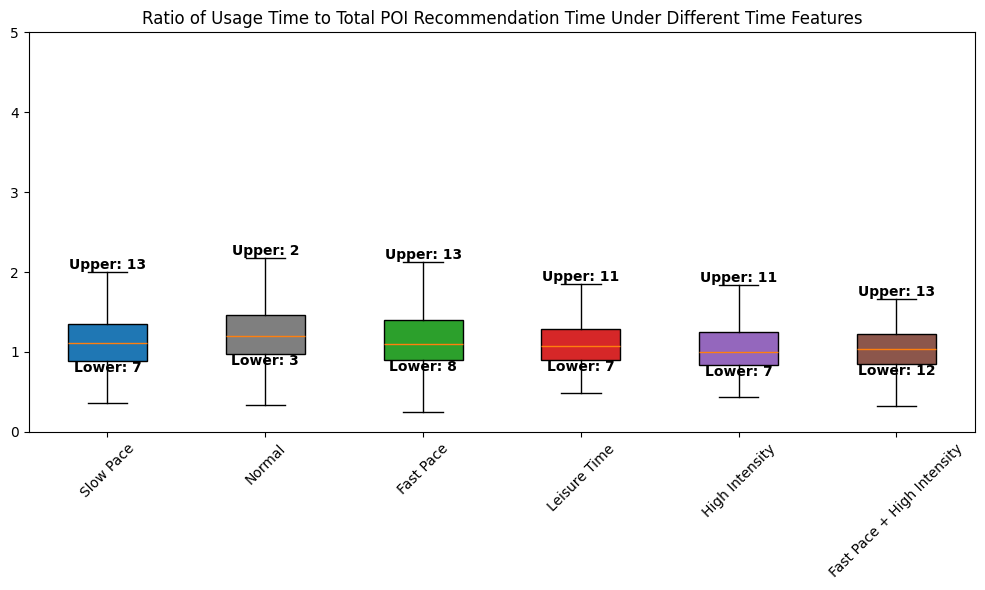

In [15]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np

# Define a function to count outliers separately
def count_outliers(data, whisker=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - whisker * iqr
    upper_bound = q3 + whisker * iqr
    lower_outliers = [x for x in data if x < lower_bound]
    upper_outliers = [x for x in data if x > upper_bound]
    return len(lower_outliers), len(upper_outliers)

# Initialize lists for different time features
use_time = [[] for i in range(6)]
start_time = [[] for i in range(6)]
poi_total_rec_time = [[] for i in range(6)]

# Assuming 'all_data' and 'all_results' are defined with your data
for index, value in enumerate(all_data):
    time_feature = value["poi_case"]['time_feature']
    if time_feature == "慢节奏":
        idx = 0
    elif time_feature == "正常":
        idx = 1
    elif time_feature == "快节奏":
        idx = 2
    elif time_feature == "时间休闲":
        idx = 3
    elif time_feature == "时间高强度":
        idx = 4
    else:
        idx = 5

    use_time[idx].append(sum([(time_to_seconds(item[-1]) - time_to_seconds(item[0])) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    start_time[idx].append(sum([time_to_seconds(item[0]) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    poi_total_rec_time[idx].append(sum([item*3600 if item <= 24 else item for day_route in all_results[index]['content']['poi_rec_time_list'] for item in day_route]) / len(all_results[index]['content']['poi_rec_time_list']))

# Save data
time_feature_results = {
    'use_time': use_time,
    'start_time': start_time,
    'poi_total_rec_time': poi_total_rec_time
}

with open(f'time_feature_results_{time.strftime("%Y%m%d%H%M%S")}.json', 'w') as f:
    json.dump(time_feature_results, f)

# Scientific color palette
colors = ['tab:blue', 'tab:grey', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Function to create boxplots without outliers but with outlier counts
def create_boxplot(data, title, labels, y_range=None):
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    result = plt.boxplot(data, labels=labels, patch_artist=True, showfliers=False)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap
    for patch, color in zip(result['boxes'], colors):
        patch.set_facecolor(color)
    # Set y-axis limits if provided
    if y_range:
        plt.ylim(y_range)
    # Counting and displaying outliers
    for i, sub_data in enumerate(data):
        lower_outliers, upper_outliers = count_outliers(sub_data)
        y_max = result['whiskers'][2*i+1].get_ydata()[1]  # Upper whisker
        y_min = result['whiskers'][2*i].get_ydata()[0]   # Lower whisker
        plt.text(i+1, y_max, f'Upper: {upper_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='bottom')
        plt.text(i+1, y_min, f'Lower: {lower_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='top')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

# Define a y-axis range common to all plots (adjust as necessary based on your data analysis)
common_y_range = (-10000, 90000)  # Example range for some plots

# Create and display boxplots for each feature with a fixed y-axis range
create_boxplot(use_time, 'Usage Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=common_y_range)
create_boxplot(poi_total_rec_time, 'Total POI Recommendation Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(0, 120000))
create_boxplot(start_time, 'Start Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(20000, 50000))
ratios = [[x/y if y != 0 else 0 for x, y in zip(sub_use_time, sub_poi_time)] for sub_use_time, sub_poi_time in zip(use_time, poi_total_rec_time)]
create_boxplot(ratios, 'Ratio of Usage Time to Total POI Recommendation Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(0,5))

In [16]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Example variable: use_time
# Replace 'use_time' with 'start_time', 'poi_total_rec_time', 'ratios' for other variables

# Normality Test
normality_results = [stats.shapiro(group) for group in use_time]
print("Normality Test Results (p-values):", [res.pvalue for res in normality_results])

# Homogeneity of Variances Test
levene_result = stats.levene(*use_time)
print(f"Levene's Test Result: Statistic = {levene_result.statistic}, p-value = {levene_result.pvalue}")

# ANOVA or Kruskal-Wallis Test
if all(res.pvalue > 0.05 for res in normality_results) and levene_result.pvalue > 0.05:
    f_val, p_val = stats.f_oneway(*use_time)
    print(f"ANOVA Result: F = {f_val}, p-value = {p_val}")
    if p_val < 0.05:
        # Post-hoc Test (Tukey's HSD)
        merged_data = np.concatenate(use_time)
        groups = np.concatenate([[i] * len(group) for i, group in enumerate(use_time)])
        tukey_result = pairwise_tukeyhsd(merged_data, groups)
        print(tukey_result)
else:
    h_val, p_val = stats.kruskal(*use_time)
    print(f"Kruskal-Wallis Result: H = {h_val}, p-value = {p_val}")
    if p_val < 0.05:
        # Post-hoc test for non-parametric data (Dunn's test can be done using an external library)
        print("Significant results, consider post-hoc testing with Dunn's test.")

Normality Test Results (p-values): [np.float64(2.50760235927308e-13), np.float64(9.36246239465734e-16), np.float64(5.087791056006232e-15), np.float64(1.3600144243672434e-18), np.float64(2.5562383318674538e-09), np.float64(4.9965648320978517e-11)]
Levene's Test Result: Statistic = 24.03577149080553, p-value = 1.0191143813715621e-23
Kruskal-Wallis Result: H = 83.08073689176246, p-value = 1.900650151527069e-16
Significant results, consider post-hoc testing with Dunn's test.


Normality Test Results (p-values): [np.float64(2.50760235927308e-13), np.float64(9.36246239465734e-16), np.float64(5.087791056006232e-15), np.float64(1.3600144243672434e-18), np.float64(2.5562383318674538e-09), np.float64(4.9965648320978517e-11)]
Levene's Test Result: Statistic = 24.03577149080553, p-value = 1.0191143813715621e-23
Kruskal-Wallis Result: H = 83.08073689176246, p-value = 1.900650151527069e-16
Dunn's test p-values:
          1             2             3             4             5  \
1  1.000000  2.971427e-02  1.499910e-01  8.832175e-04  7.584550e-01   
2  0.029714  1.000000e+00  1.000000e+00  1.736566e-11  1.000000e+00   
3  0.149991  1.000000e+00  1.000000e+00  6.461023e-10  1.000000e+00   
4  0.000883  1.736566e-11  6.461023e-10  1.000000e+00  3.506510e-08   
5  0.758455  1.000000e+00  1.000000e+00  3.506510e-08  1.000000e+00   
6  0.002037  1.000000e+00  1.000000e+00  7.147508e-14  9.421177e-01   

              6  
1  2.036848e-03  
2  1.000000e+00  
3  1.000000e+00

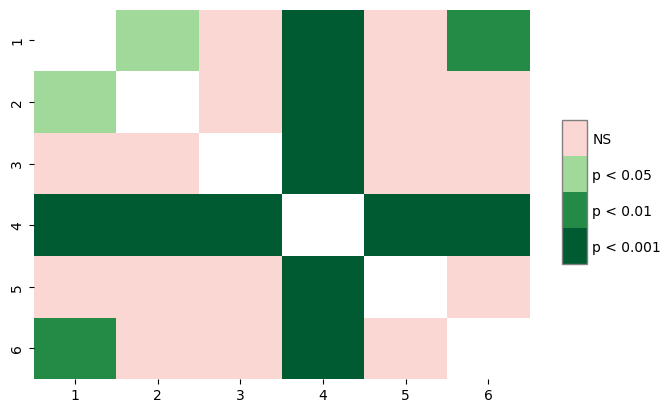

In [17]:
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import json
import time

# Example data loading and preparation steps
# Make sure your data is loaded into use_time, start_time, poi_total_rec_time, ratios as lists of lists

# Function to perform statistical tests
def perform_statistical_tests(data, group_labels):
    # Normality Test
    normality_results = [stats.shapiro(group) for group in data]
    print("Normality Test Results (p-values):", [res.pvalue for res in normality_results])

    # Homogeneity of Variances Test
    levene_result = stats.levene(*data)
    print(f"Levene's Test Result: Statistic = {levene_result.statistic}, p-value = {levene_result.pvalue}")

    # ANOVA or Kruskal-Wallis Test
    if all(res.pvalue > 0.05 for res in normality_results) and levene_result.pvalue > 0.05:
        f_val, p_val = stats.f_oneway(*data)
        print(f"ANOVA Result: F = {f_val}, p-value = {p_val}")
        if p_val < 0.05:
            # Post-hoc Test (Tukey's HSD)
            merged_data = np.concatenate(data)
            groups = np.concatenate([[i] * len(group) for i, group in enumerate(data)])
            tukey_result = pairwise_tukeyhsd(merged_data, groups)
            print(tukey_result)
    else:
        h_val, p_val = stats.kruskal(*data)
        print(f"Kruskal-Wallis Result: H = {h_val}, p-value = {p_val}")
        if p_val < 0.05:
            # Post-hoc test for non-parametric data (Dunn's test)
            merged_data = np.concatenate(data)
            groups = np.concatenate([[i] * len(group) for i, group in enumerate(data)])
            dunn_result = sp.posthoc_dunn([group for group in data], p_adjust='bonferroni')
            print("Dunn's test p-values:")
            print(dunn_result)
            # Plotting the significant pairwise comparisons
            sp.sign_plot(dunn_result)

# Perform statistical tests on your datasets
group_labels = ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity']

# Example calls to the function
# Ensure your datasets like 'use_time' are loaded correctly before calling this function
perform_statistical_tests(use_time, group_labels)
# perform_statistical_tests(start_time, group_labels)
# perform_statistical_tests(poi_total_rec_time, group_labels)
# perform_statistical_tests(ratios, group_labels)

Normality Test Results (p-values): [np.float64(1.5859651303609176e-35), np.float64(2.7123873902714675e-35), np.float64(1.5094384964425006e-38), np.float64(2.9957819756034505e-33), np.float64(2.959597129133211e-39), np.float64(7.182059133068123e-39)]
Levene's Test Result: Statistic = 3.353901712406673, p-value = 0.00505014464867383
Kruskal-Wallis Result: H = 1627.8055469279461, p-value = 0.0
Dunn's test p-values:
               1             2              3              4              5  \
1   1.000000e+00  1.000000e+00   1.000000e+00   9.674723e-52   4.865867e-36   
2   1.000000e+00  1.000000e+00   2.655848e-01   1.549488e-59   4.858271e-30   
3   1.000000e+00  2.655848e-01   1.000000e+00   9.262000e-44   2.605217e-43   
4   9.674723e-52  1.549488e-59   9.262000e-44   1.000000e+00  4.790508e-172   
5   4.865867e-36  4.858271e-30   2.605217e-43  4.790508e-172   1.000000e+00   
6  3.824611e-104  9.804040e-94  2.710341e-116  3.280332e-300   2.168602e-18   

               6  
1  3.824611

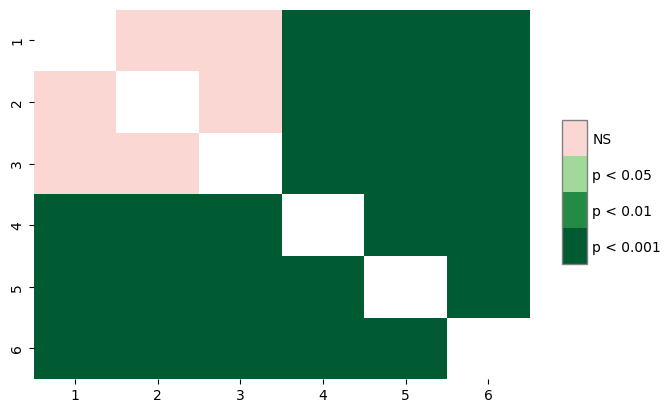

In [18]:
perform_statistical_tests(start_time, group_labels)

Normality Test Results (p-values): [np.float64(5.494448739124454e-15), np.float64(0.019065365081080674), np.float64(0.022292397513369547), np.float64(0.19844816777584512), np.float64(2.6875728340044623e-05), np.float64(0.21221185054339303)]
Levene's Test Result: Statistic = 10.863210921396371, p-value = 2.3102247451903504e-10
Kruskal-Wallis Result: H = 109.91598710327311, p-value = 4.268304277926534e-22
Dunn's test p-values:
              1             2         3             4             5  \
1  1.000000e+00  1.000000e+00  0.432540  1.000000e+00  8.768630e-08   
2  1.000000e+00  1.000000e+00  0.973713  1.000000e+00  6.335368e-07   
3  4.325403e-01  9.737134e-01  1.000000  2.313983e-01  4.163399e-03   
4  1.000000e+00  1.000000e+00  0.231398  1.000000e+00  2.072542e-08   
5  8.768630e-08  6.335368e-07  0.004163  2.072542e-08  1.000000e+00   
6  6.553872e-13  8.415647e-12  0.000001  1.037555e-13  1.000000e+00   

              6  
1  6.553872e-13  
2  8.415647e-12  
3  1.222464e-06  
4

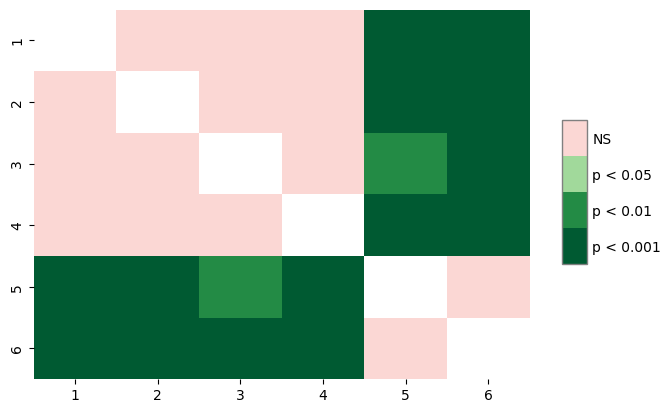

In [19]:
perform_statistical_tests(poi_total_rec_time, group_labels)

Normality Test Results (p-values): [np.float64(1.934393053364153e-09), np.float64(0.3232700245315374), np.float64(4.315173717545026e-09), np.float64(9.923310213049873e-08), np.float64(2.032874460548625e-10), np.float64(5.88482462802036e-10)]
Levene's Test Result: Statistic = 7.237191236396103, p-value = 9.674322077331414e-07
Kruskal-Wallis Result: H = 69.61811000892901, p-value = 1.2305476665987907e-13
Dunn's test p-values:
          1             2         3         4             5             6
1  1.000000  5.186839e-03  1.000000  1.000000  4.576844e-03  2.017956e-02
2  0.005187  1.000000e+00  0.027271  0.000272  9.772444e-12  1.747682e-10
3  1.000000  2.727084e-02  1.000000  1.000000  7.027856e-04  3.695283e-03
4  1.000000  2.717657e-04  1.000000  1.000000  5.555815e-02  1.875751e-01
5  0.004577  9.772444e-12  0.000703  0.055558  1.000000e+00  1.000000e+00
6  0.020180  1.747682e-10  0.003695  0.187575  1.000000e+00  1.000000e+00


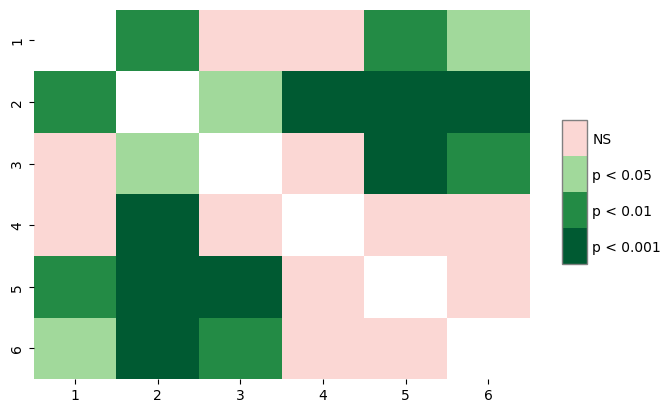

In [20]:
perform_statistical_tests(ratios, group_labels)

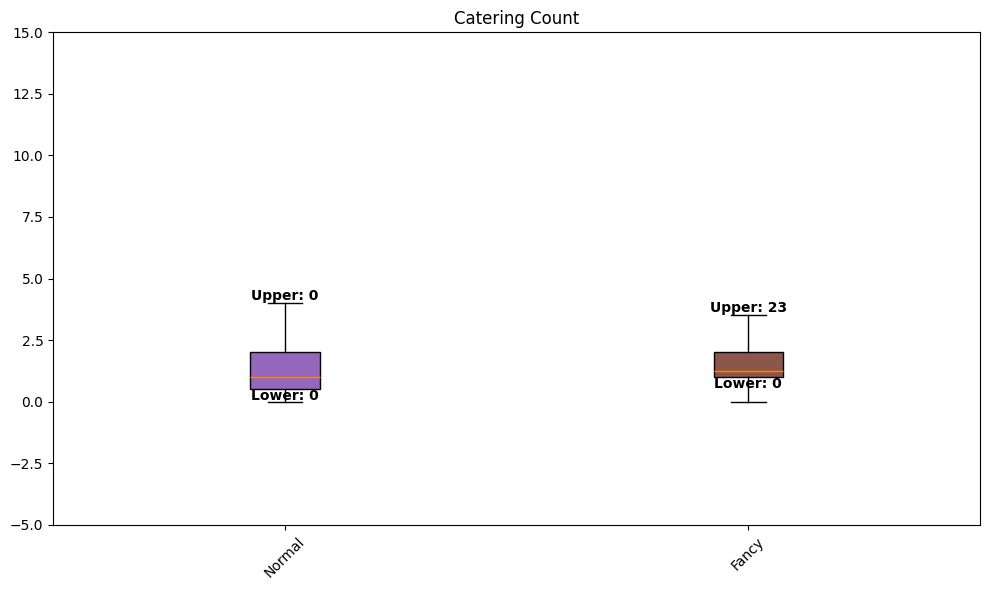

In [21]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np

# Define a function to count outliers separately
def count_outliers(data, whisker=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - whisker * iqr
    upper_bound = q3 + whisker * iqr
    lower_outliers = [x for x in data if x < lower_bound]
    upper_outliers = [x for x in data if x > upper_bound]
    return len(lower_outliers), len(upper_outliers)

# Initialize lists for different time features
catering_count = [[] for _ in range(2)]

# Assuming 'all_data' and 'all_results' are defined with your data
for index, value in enumerate(all_data):
    catering_feature = value["poi_case"]['catering_feature']
    if catering_feature == "常规":
        idx = 0
    elif catering_feature == "美食":
        idx = 1

    catering_count[idx].append(sum([1 if item == '餐厅' else 0 for day_route in all_results[index]['content']['poi_cate_list'] for item in day_route]) / len(all_results[index]['content']['poi_cate_list']))

# Save data
catering_feature_results = {
    "catering_count": catering_count
}

# Scientific color palette
colors = ['tab:purple', 'tab:brown']

# Function to create boxplots without outliers but with outlier counts
def create_boxplot(data, title, labels, y_range=None):
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    result = plt.boxplot(data, labels=labels, patch_artist=True, showfliers=False)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap
    for patch, color in zip(result['boxes'], colors):
        patch.set_facecolor(color)
    # Set y-axis limits if provided
    if y_range:
        plt.ylim(y_range)
    # Counting and displaying outliers
    for i, sub_data in enumerate(data):
        lower_outliers, upper_outliers = count_outliers(sub_data)
        y_max = result['whiskers'][2*i+1].get_ydata()[1]  # Upper whisker
        y_min = result['whiskers'][2*i].get_ydata()[0]   # Lower whisker
        plt.text(i+1, y_max, f'Upper: {upper_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='bottom')
        plt.text(i+1, y_min, f'Lower: {lower_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='top')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

# Define a y-axis range common to all plots (adjust as necessary based on your data analysis)
common_y_range = (-5, 15)  # Example range for some plots

# Create and display boxplots for each feature with a fixed y-axis range
create_boxplot(catering_count, 'Catering Count', ['Normal', 'Fancy'], y_range=common_y_range)

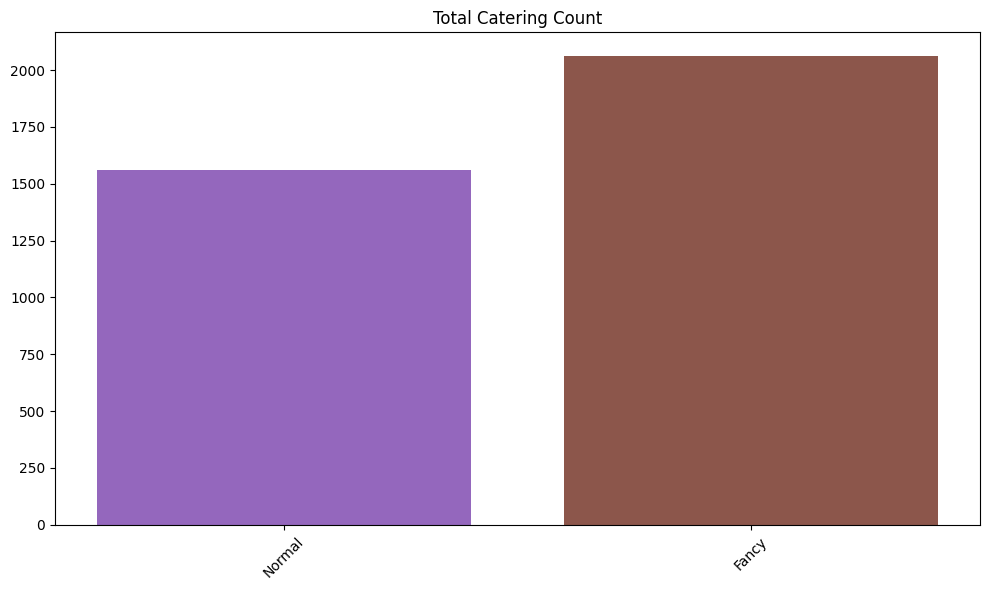

In [22]:
# 绘制总数柱状图
plt.figure(figsize=(10, 6))  # 调整图表大小
plt.bar(['Normal', 'Fancy'], [sum(catering_count[0]), sum(catering_count[1])], color=colors)
plt.title('Total Catering Count')
plt.xticks(rotation=45)  # 旋转标签以防止重叠
plt.tight_layout()  # 调整布局以防止标签被剪切
plt.show()

Normality Test Results (p-values): [np.float64(7.4339904947682795e-28), np.float64(1.189989682833229e-35)]
Levene's Test Result: Statistic = 2.7150760371931173, p-value = 0.09952332453256096
Kruskal-Wallis Result: H = 110.37185123863998, p-value = 8.123037801393263e-26
Dunn's test p-values:
              1             2
1  1.000000e+00  8.123038e-26
2  8.123038e-26  1.000000e+00


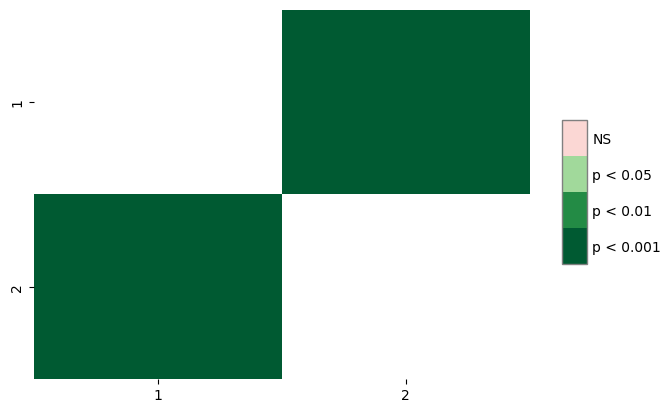

In [23]:
#差异性检验
group_labels_catering = ['Normal', 'Fancy']
perform_statistical_tests(catering_count, group_labels_catering)